# Thermoelasticity-based modal damage identification

## Import packages

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pyLIA as lia
import pysfmov as sfmov

## Input parameters

### Thermal video

In [185]:
filename = './data/rec44.sfmov'
fs = 400
(x,y,w,h) = 38,78,5,5 #vert mode area
min_treshold_fft = 10 # HZ
max_treshold_fft = 40 # HZ
span_fft = 0.1

### Material

In [160]:
k = 6.51 # slope endurance curve
B = 800.26 # endurance curve
km = 1/ (6 * 2 * 10**(-9))  # Calibration Factor [Pa^-1]

## Starting

In [161]:
data = sfmov.get_data(filename)

In [162]:
nframes = data.shape[0]
dt = 1/fs
time = np.linspace(0,nframes/fs, nframes, endpoint=True)

bas = -1/k
C = B**k  # s = B * N**bas or s^k * N = C

In [163]:
stress_ampl = (data - data[0,:,:]) * km * 10**-6 # stress amplitude in MPa

## FFT

In [164]:
fft = (np.fft.rfft(stress_ampl, nframes-1, axis=0) *2/(nframes - 1))[:,y:(y+h),x:(x+w)]
freq = np.fft.rfftfreq(nframes-1, 1/fs)

fft_avg = np.zeros((1,fft.shape[0]))
for p in range(0,len(freq)):
    fft_avg[0,p] = np.mean(np.abs(fft[p,:,:]))

In [186]:
y_peak = np.max(fft_avg[0,:][(freq > min_treshold_fft) & (freq < max_treshold_fft)])
x_peak = freq[np.where(fft_avg[0,:] == y_peak)[0][0]]

In [188]:
band = (freq>=x_peak-span_fft)&(freq<=x_peak+span_fft)
A = np.mean(fft_avg[0,band])

D = x_peak / (C / A**k)

## Endurance curve

Text(0.5, 1.0, 'Endurance curve')

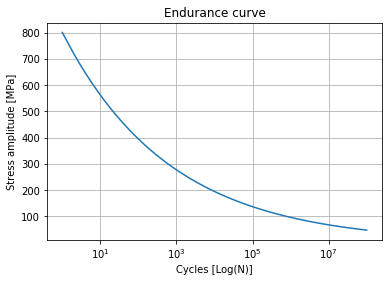

In [179]:
N = np.linspace(1,10**8,10**8)
s = B * N**bas

plt.semilogx(N,s)
plt.grid()
plt.xlabel('Cycles [Log(N)]')
plt.ylabel('Stress amplitude [MPa]')
plt.title('Endurance curve')

## FFT and Natural frequency


In [ ]:
plt.figure()
plt.semilogy(freq,fft_avg[0,:], c = 'C0')
plt.grid()
plt.scatter(x_peak, y_peak,s = 100, c='C3', marker = 'o')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [MPa]')
plt.title('FFT')